In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import os 

# Data Preparation Tasks:

## Loading and Joining Raw data

In [2]:
print(os.getcwd())

C:\Users\arsal\opencv\Scripts\OFSTED\notebooks


In [3]:
os.chdir('../data/raw')

In [4]:
print(os.getcwd())
current_dir = os.getcwd()

C:\Users\arsal\opencv\Scripts\OFSTED\data\raw


In [5]:
england_school_information_df = pd.read_excel(current_dir + '/england_school_information.xlsx')

In [6]:
reduce_list = ['URN','LA', 'GENDER', 'RELCHAR']
england_school_information_df = england_school_information_df.loc[england_school_information_df['ISSECONDARY'] == 1]
england_school_information_df = england_school_information_df[reduce_list]
england_school_information_df.shape

(6396, 4)

In [7]:
england_census_df = pd.read_excel(current_dir + '/england_census.xlsx')

In [8]:
# total number of students in each school
england_census_df['PNUMFSM'] = england_census_df['NUMFSM'] / england_census_df['NOR'] * 100
percentage_col = [col for col in england_census_df if col.startswith('P')]
attributesList = ['URN','LA'] + percentage_col

In [9]:
england_census_df = england_census_df[attributesList] # cut down data frame
england_census_df.shape

(23942, 11)

In [10]:
england_abs_df = pd.read_excel(current_dir + '/england_abs.xlsx')

In [11]:
england_abs_df.drop(columns=['ESTAB'],inplace=True)
england_abs_df.shape

(21217, 4)

In [12]:
england_ks4provisional_df = pd.read_excel(current_dir + '/england_ks4provisional.xlsx')

In [13]:
columnList = ['URN', 'LEA', 'TPUP', 'P8PUP', 'ATT8SCR', 'P8MEA', 'P8CILOW', 'P8CIUPP', 'EBACCAPS', 'PTL2BASICS_94', 'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'PTEBACC_94', 'PTEBACC_95', 'PT5EM_94','P8_BANDING']
england_ks4provisional_df = england_ks4provisional_df[columnList]
england_ks4provisional_df.shape

(5652, 16)

In [14]:
england_ks4_pupdes_df = pd.read_excel(current_dir + '/england_ks4-pupdest.xlsx')

In [15]:
england_ks4_pupdes_df = england_ks4_pupdes_df[['URN', 'LEA', 'OVERALL_DESTPER', 'NOT_SUSTAINEDPER', 'UNKNOWNPER', 'OVERALL_DESTPER_DIS', 'NOT_SUSTAINEDPER_DIS','UNKNOWNPER_DIS']]
england_ks4_pupdes_df.shape

(3877, 8)

Merging of **english_school_information** and **england_census** as **merge_df**

In [16]:
merge_df1 = pd.merge(england_school_information_df,england_census_df, how='left', on=['URN','LA'])
merge_df1.shape

(6396, 13)

Merging:
**merge_df1** with **england_abs** as **merge_df2**

In [17]:
merge_df2 = pd.merge(merge_df1,england_abs_df , how='left', on=['URN','LA'])
merge_df2.shape

(6396, 15)

Merging:
**merge_df2** with **england_ks4provisional** as **merge_df3**

In [18]:
merge_df3 = pd.merge(merge_df2,england_ks4provisional_df , how='left', on=['URN'])
merge_df3.shape

(6396, 30)

Merging:
**merge_df3** with **england_ks4-pupdest** as **merge_df4**

In [19]:
merge_df4 = pd.merge(merge_df3,england_ks4_pupdes_df, how='left', on=['URN','LEA'])
merge_df4.shape

(6396, 36)

In [20]:
merge_df4.columns

Index(['URN', 'LA', 'GENDER', 'RELCHAR', 'PNORG', 'PNORB', 'PSENELSE',
       'PSENELK', 'PNUMEAL', 'PNUMENGFL', 'PNUMUNCFL', 'PNUMFSMEVER',
       'PNUMFSM', 'PERCTOT', 'PPERSABS10', 'LEA', 'TPUP', 'P8PUP', 'ATT8SCR',
       'P8MEA', 'P8CILOW', 'P8CIUPP', 'EBACCAPS', 'PTL2BASICS_94',
       'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'PTEBACC_94', 'PTEBACC_95',
       'PT5EM_94', 'P8_BANDING', 'OVERALL_DESTPER', 'NOT_SUSTAINEDPER',
       'UNKNOWNPER', 'OVERALL_DESTPER_DIS', 'NOT_SUSTAINEDPER_DIS',
       'UNKNOWNPER_DIS'],
      dtype='object')

In [21]:
ofsted_ratings_df = pd.read_excel(current_dir + '/OFSTED Ratings.xlsx')
ofsted_ratings_df.shape

(6396, 2)

Merging:
**merge_df4** with **OFSTED Ratings** as **merge_df5**

In [22]:
merge_df5 = pd.merge(merge_df4,ofsted_ratings_df, how='inner', on='URN')
merge_df5.shape

(6396, 37)

In [23]:
merge_df5.columns

Index(['URN', 'LA', 'GENDER', 'RELCHAR', 'PNORG', 'PNORB', 'PSENELSE',
       'PSENELK', 'PNUMEAL', 'PNUMENGFL', 'PNUMUNCFL', 'PNUMFSMEVER',
       'PNUMFSM', 'PERCTOT', 'PPERSABS10', 'LEA', 'TPUP', 'P8PUP', 'ATT8SCR',
       'P8MEA', 'P8CILOW', 'P8CIUPP', 'EBACCAPS', 'PTL2BASICS_94',
       'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'PTEBACC_94', 'PTEBACC_95',
       'PT5EM_94', 'P8_BANDING', 'OVERALL_DESTPER', 'NOT_SUSTAINEDPER',
       'UNKNOWNPER', 'OVERALL_DESTPER_DIS', 'NOT_SUSTAINEDPER_DIS',
       'UNKNOWNPER_DIS', 'Rating'],
      dtype='object')

In [24]:
combined_ofsted_df = pd.read_excel(current_dir + '/Combined OFSTED data.xlsx')
print('Extra column in my merging: ' + merge_df5.columns[(merge_df5.columns.isin(combined_ofsted_df)) == False])
print(combined_ofsted_df.shape)

Index(['Extra column in my merging: LEA'], dtype='object')
(6396, 36)


## Missing values by Columns 

The results confirms only four attributes are not missing any data i.e. URN,LA,GENDER,Rating as mentioned.

In [25]:
combined_ofsted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URN                   6396 non-null   int64  
 1   LA                    6396 non-null   int64  
 2   GENDER                6396 non-null   object 
 3   RELCHAR               6253 non-null   object 
 4   PNORG                 5532 non-null   float64
 5   PNORB                 5532 non-null   float64
 6   PSENELSE              5528 non-null   float64
 7   PSENELK               5530 non-null   float64
 8   PNUMEAL               4157 non-null   float64
 9   PNUMENGFL             4157 non-null   float64
 10  PNUMUNCFL             4157 non-null   float64
 11  PNUMFSM               4157 non-null   float64
 12  PNUMFSMEVER           4155 non-null   float64
 13  PERCTOT               4170 non-null   float64
 14  PPERSABS10            4170 non-null   object 
 15  TPUP                 

9. With much of the data missing, we have to decide what to do next. Briefly explain in your notebook 3 options for handling the situation, evaluate them and apply your chosen solution to create a dataset with no missing values.

In [26]:
combined_ofsted_df.isna().sum()

URN                        0
LA                         0
GENDER                     0
RELCHAR                  143
PNORG                    864
PNORB                    864
PSENELSE                 868
PSENELK                  866
PNUMEAL                 2239
PNUMENGFL               2239
PNUMUNCFL               2239
PNUMFSM                 2239
PNUMFSMEVER             2241
PERCTOT                 2226
PPERSABS10              2226
TPUP                    2448
P8PUP                   2448
ATT8SCR                 2448
P8MEA                   2448
P8CILOW                 2448
P8CIUPP                 2448
EBACCAPS                2448
PTL2BASICS_94           2448
PTL2BASICS_95           2448
PTEBACC_E_PTQ_EE        2448
PTEBACC_94              2448
PTEBACC_95              2448
PT5EM_94                2448
P8_BANDING              2863
OVERALL_DESTPER         2668
NOT_SUSTAINEDPER        2668
UNKNOWNPER              2668
OVERALL_DESTPER_DIS     2668
NOT_SUSTAINEDPER_DIS    2668
UNKNOWNPER_DIS

## Strategies to Handle Missing Values

1) **Deleting Rows:** 

Missing values can be handled by deleting the rows or columns having null values.

2) **Impute missing values with Mean/Median:**

Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method.

3) **Imputation method for categorical columns:**


When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category or if the number of missing values is very large then it can be replaced with a new category.


I'm going to make copy of orginal data and then I will perform this action:

impute missing values with mean in PNORG column. After this I will compare with original column description

In [27]:
mean_imputation_df = combined_ofsted_df.copy()
mean_imputation_df['PNORG'] = mean_imputation_df['PNORG'].fillna(combined_ofsted_df['PNORG'].mean())

In [28]:
combined_ofsted_df['PNORG'].describe()

count    5532.000000
mean       44.108008
std        21.648989
min         0.000000
25%        35.300000
50%        47.600000
75%        50.500000
max       100.000000
Name: PNORG, dtype: float64

In [29]:
mean_imputation_df['PNORG'].describe()
## after imputing missing data with mean it will change standard deviation and quartile values will be change
##but mean will remain same 

count    6396.000000
mean       44.108008
std        20.133495
min         0.000000
25%        39.200000
50%        46.000000
75%        50.000000
max       100.000000
Name: PNORG, dtype: float64

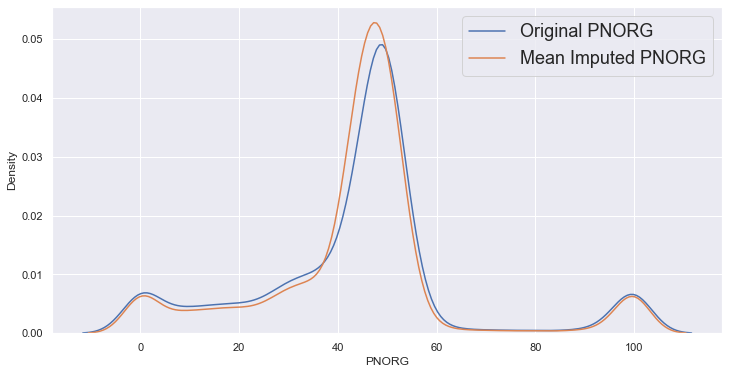

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(combined_ofsted_df['PNORG'], ax=ax, hist=False, label='Original PNORG')
sns.distplot(mean_imputation_df['PNORG'], ax=ax, hist=False, label='Mean Imputed PNORG')
ax.legend(fontsize=18)

## Both left and right side are close-ish, but the significant differences are around the middle — as you can see.

Now going to impute mean all the columns all the columns

In [31]:
float_df = combined_ofsted_df.loc[:,combined_ofsted_df.dtypes == float]
combined_ofsted_df[float_df.columns] = combined_ofsted_df.filter(float_df.columns).fillna(float_df.mean())

In [32]:
object_df = combined_ofsted_df.loc[:,combined_ofsted_df.dtypes == object].drop(columns=['GENDER','RELCHAR','Rating'])
object_df = object_df.transform(pd.to_numeric, errors='coerce')
combined_ofsted_df[object_df.columns]= combined_ofsted_df.filter(object_df.columns).fillna(object_df.median())

In [33]:
combined_ofsted_df['RELCHAR'] = combined_ofsted_df['RELCHAR'].fillna('Missing')

In [34]:
combined_ofsted_df.isna().sum()

URN                     0
LA                      0
GENDER                  0
RELCHAR                 0
PNORG                   0
PNORB                   0
PSENELSE                0
PSENELK                 0
PNUMEAL                 0
PNUMENGFL               0
PNUMUNCFL               0
PNUMFSM                 0
PNUMFSMEVER             0
PERCTOT                 0
PPERSABS10              0
TPUP                    0
P8PUP                   0
ATT8SCR                 0
P8MEA                   0
P8CILOW                 0
P8CIUPP                 0
EBACCAPS                0
PTL2BASICS_94           0
PTL2BASICS_95           0
PTEBACC_E_PTQ_EE        0
PTEBACC_94              0
PTEBACC_95              0
PT5EM_94                0
P8_BANDING              0
OVERALL_DESTPER         0
NOT_SUSTAINEDPER        0
UNKNOWNPER              0
OVERALL_DESTPER_DIS     0
NOT_SUSTAINEDPER_DIS    0
UNKNOWNPER_DIS          0
Rating                  0
dtype: int64

## Checking that all values in the columns are valid

There are some coulmns with negative values which includes:

1. **P8MEA(Progress 8 measure after adjustment for extreme scores):** 

A negative progress score does not mean pupils made no progress, or the school has failed, rather it means pupils in the school made less progress than other pupils across England with similar results at the end of key stage 2.

2. **P8CILOW(Progress 8 lower 95% confidence interval for adjusted average)**

When the confidence interval straddles zero (sLowCI< 0 <sUppCI), the school’s Progress 8 score is likely to be above or below average, and the result is not statistically significant

3. **P8CIUPP(Progress 8 upper 95% confidence interval for adjusted average)**

When a school has their upper confidence interval limit lower than zero (sUppCI< 0), the school’s Progress 8 score is below average and the result is statistically significant

## Sanity checks

### General abbreviations:

1) NEW	New institution																
2) NE	No entries: the school or college did not enter any pupils or students for the qualifications covered by the measure																
3) NA	Not applicable: figures are either not available for the year in question, or the data field is not applicable to this school or college																
4) SUPP	Suppressed: In certain circumstances we will suppress an establishment's data. This is usually when there are 5 or fewer pupils or students covered by the measure (10 in the case of destination measures)																
5) NP	Not published: for example, we do not publish Progress 8 data for independent schools and independent special schools, or breakdowns by disadvantaged and other pupils for independent schools, independent special schools and non-maintained special schools																
6) LOWCOV	Low coverage: shown for the ‘value added’ measure and coverage indicator where schools have less than 50% of pupils included in calculation of the measure																
7) SP	Small percentage: the number is between 0% and 0.5%																
8) RE	Redacted: of a reliable estimate and therefore don’t provide a fair measure of performance. For transparency, we publish the headline information for these providers separately in the national achievement rates tables

**TEST : 1**

**PNUMEAL** (pupils where English not first language)

**PNUMENGFL** (pupils with English first language)

**PNUMUNCFL** (pupils where first language is unclassified)

add to 100 for all rows

In [35]:
combined_ofsted_df[['PNUMEAL','PNUMENGFL','PNUMUNCFL']].head()

,PNUMEAL,PNUMENGFL,PNUMUNCFL
0,15.591941,83.990306,0.418066
1,15.591941,83.990306,0.418066
2,15.591941,83.990306,0.418066
3,73.100000,26.800000,0.100000
4,38.100000,60.900000,0.900000


In [36]:
Total = combined_ofsted_df['PNUMEAL'] + combined_ofsted_df['PNUMENGFL'] + combined_ofsted_df['PNUMUNCFL']
Total.describe()

count    6396.000000
mean      100.000313
std         0.026080
min        99.900000
25%       100.000000
50%       100.000000
75%       100.000313
max       100.100000
dtype: float64

**TEST : 2**

**OVERALL_DESTPER** (Pupils staying in education or employment for at least two terms after key stage 4 (percentage))

**NOT_SUSTAINEDPER** (Pupils not staying in education or employment for at least two terms after key stage 4 (percentage))

add to 100 for all rows


In [37]:
combined_ofsted_df[['OVERALL_DESTPER_DIS','NOT_SUSTAINEDPER_DIS']].head()

,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS
0,0.9,0.09
1,0.9,0.09
2,0.9,0.09
3,0.89,0.11
4,0.95,0.04


In [38]:
## replacing non-numeric values with mean
mean = round(combined_ofsted_df['OVERALL_DESTPER_DIS'].transform(pd.to_numeric, errors='coerce').mean(),1)
dictMean = {'NEW':mean,'NE': mean,'NA': mean, 'NP': mean, 'SUPP': mean, 'LOWCOV': mean,'SP': mean,'RE': mean}
sum1 = combined_ofsted_df['OVERALL_DESTPER_DIS'].replace(dictMean)

In [39]:
## replacing non-numeric values with mean
mean = round(combined_ofsted_df['NOT_SUSTAINEDPER_DIS'].transform(pd.to_numeric, errors='coerce').mean(),1)
dictMean = {'NEW':mean,'NE': mean,'NA': mean, 'NP': mean, 'SUPP': mean, 'LOWCOV': mean,'SP': mean,'RE': mean}
sum2 = combined_ofsted_df['NOT_SUSTAINEDPER_DIS'].replace(dictMean)

In [40]:
Total = (sum1 + sum2) * 100
Total.describe()

count    6396.000000
mean       99.042527
std         1.643164
min        77.000000
25%        99.000000
50%        99.000000
75%       100.000000
max       110.000000
dtype: float64

In [41]:
combined_ofsted_df.shape

(6396, 36)

In [42]:
print(os.getcwd())

C:\Users\arsal\opencv\Scripts\OFSTED\data\raw


In [43]:
os.chdir('../processed')

In [44]:
print(os.getcwd())

C:\Users\arsal\opencv\Scripts\OFSTED\data\processed


In [45]:
# DF TO CSV
combined_ofsted_df.to_csv(os.getcwd() + '/ComponentOneData.csv', sep=',',index=False)